# 先用最小的数据集训练，看看效果。再逐渐扩大，比较效果。
train=0.1.csv ：训练集的1/10，样本数= 228800
## 线性回归

In [14]:
# 导入必要的工具包
import numpy as np #用于数值计算
import pandas as pd #用于数据表处理，数据文件读写
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt #用于绘图：分析结果的可视化。
import seaborn as sns #用于绘图：分析结果的可视化。封装更好。
from IPython.display import display

#应该是设置浮点数的形式格式，小数点后三位
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#这一行是干嘛的？ 设置 matplotlib 让绘制的图形出现在 Notebook 里而不是新窗口
%matplotlib inline

In [15]:
Y_Standard = False
# 生成的结果文件编号
out_id = '_1'

#读取训练数据: 
dpath = '../data/new/'
summit_path = '../data/summit/'
train = pd.read_csv(dpath + 'train=0.1-fe-coor0.3-pay.csv')
train.head()

,user_id,sr_infantry_atk_level,magic_add_value,cavalry_add_value,sr_rss_e_gather_level,sr_cavalry_atk_level,sr_march_size_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_shaman_atk_level,...,wood_reduce_value,general_acceleration_add_value,wood_add_value,stone_add_value,general_acceleration_reduce_value,ivory_reduce_value,ivory_add_value,stone_reduce_value,pay_price,prediction_pay_price
0,878466,1,970840.0000,420,0,0,0,0,0,0,...,4235090.0000,659,4788674.0000,3014688.0000,478,0.0000,1045000.0000,2102260.0000,2.9800,2.9800
1,2078768,0,1547887.0000,1265,0,0,0,0,0,1,...,6394213.0000,4248,9964534.0000,4504160.0000,730,0.0000,1702932.0000,2281412.0000,1.9800,1.9800
2,66889,0,30301.0000,0,0,0,0,0,0,0,...,545664.0000,932,1853155.0000,1020000.0000,13,0.0000,503000.0000,0.0000,0.9900,0.9900
3,3169202,1,3576488.0000,4345,0,1,0,0,0,1,...,12919086.0000,6110,14578830.0000,6907604.0000,6110,1565976.0000,3787258.0000,5026825.0000,0.9900,0.9900
4,878159,0,41091.0000,0,0,0,0,0,0,0,...,1431281.0000,56,2462137.0000,1000000.0000,56,0.0000,506000.0000,0.0000,0.9900,0.9900


In [16]:
test = pd.read_csv(dpath + 'tap_fun_test-fe-coor0.3.csv')
test.head()

,user_id,sr_infantry_atk_level,magic_add_value,cavalry_add_value,sr_rss_e_gather_level,sr_cavalry_atk_level,sr_march_size_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_shaman_atk_level,...,training_acceleration_reduce_value,wood_reduce_value,general_acceleration_add_value,wood_add_value,stone_add_value,general_acceleration_reduce_value,ivory_reduce_value,ivory_add_value,stone_reduce_value,pay_price
0,14933,0,0,0,0,0,0,0,0,0,...,0,138362.0000,3,166415.0000,0,0,0,0,0,0.0000
1,14934,0,0,0,0,0,0,0,0,0,...,0,600.0000,0,10000.0000,0,0,0,0,0,0.0000
2,14935,0,0,0,0,0,0,0,0,0,...,0,3700.0000,0,10000.0000,0,0,0,0,0,0.0000
3,14936,0,60000,0,0,0,0,0,0,0,...,0,0.0000,660,210000.0000,200000,0,0,200000,0,0.0000
4,14937,0,0,0,0,0,0,0,0,0,...,0,3700.0000,0,11500.0000,0,0,0,0,0,0.0000


In [17]:
# 从原始数据中分离输入特征x和输出y
target = 'prediction_pay_price'
id = 'user_id'
train_y = train[target].values
train_X = train.drop([target, id], axis = 1)

# test_id = test[id]
test_X = test.drop([id], axis = 1)

## 数据标准化

In [18]:
# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
train_X = ss_X.fit_transform(train_X)
test_X = ss_X.transform(test_X)

# 无论是否标准化 train_y 得到的预测结果相同
if Y_Standard:
    train_y = ss_y.fit_transform(train_y.reshape(-1, 1))

In [19]:
# 标准化数据还原 
def inverse_StandardScaler(predict):
    if Y_Standard:
        predict = ss_y.inverse_transform(predict)
        print('predict = ', predict)
    return predict

## 模型训练
### 1. 尝试缺省参数的线性回归：最小二乘

In [20]:
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化：各个参数的含义还不明白
lr = LinearRegression()

# 训练模型参数
lr.fit(train_X, train_y)

# 预测，下面计算 score 会自动调用 predict
# lr_y_predict = lr.predict(test_X)
lr_y_predict_train = lr.predict(train_X)
lr_y_predict_train

array([ 10.93602871,  65.70778859, -13.9718324 , ...,  20.45705175,
        47.37858823,  39.54225215])

In [21]:
#训练集
lrScoreTrain = lr.score(train_X, train_y)
print('The value of default measurement of LinearRegression on train is', lrScoreTrain) 
# The value of default measurement of LinearRegression on train is 0.765645302023

The value of default measurement of LinearRegression on train is 0.765645302023


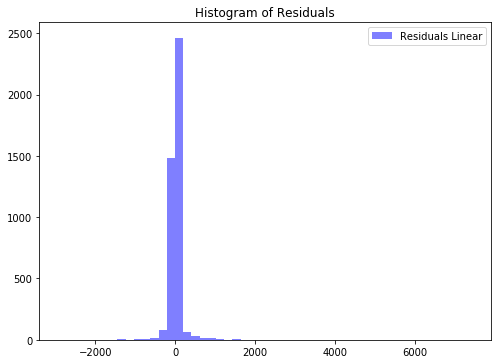

In [22]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(train_y - lr_y_predict_train, bins=50, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best') 

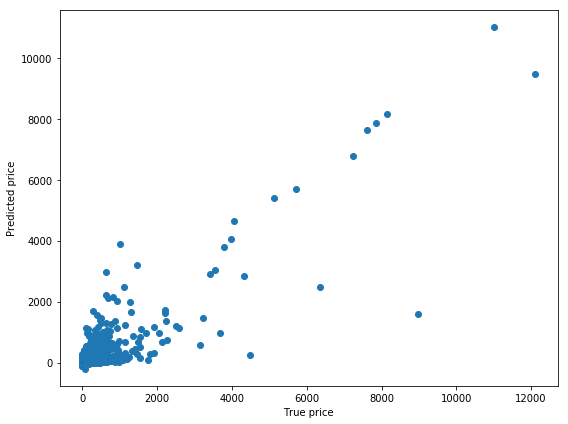

In [23]:
#观察预测值与真值的散点图
plt.figure(figsize=(8, 6))
plt.scatter(train_y, lr_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

## 1.2 LinearRegression 模型应用

In [24]:
#对测试数据进行预测
lr_y_predict_test = lr.predict(test_X)
print('lr_y_predict_test = ', lr_y_predict_test)

# 标准化数据还原 
lr_y_predict_test = inverse_StandardScaler(lr_y_predict_test)

lr_y_predict_test =  [-21.75282012 -21.55933804 -21.61631388 ..., -19.33395744 -21.75226651
 -21.75226651]


In [25]:
#输出预测后的数据
def generate_summit(predict):
    testPredict = test.copy()
    testPredict[target] = predict
    testPredict = testPredict[[id,target]]
    testPredict[target] = testPredict[target].apply(lambda x: x if x > 0 else 0)
    return testPredict

#输出预测后的数据
testPredict = generate_summit(lr_y_predict_test)
testPredict.head()

,user_id,prediction_pay_price
0,14933,0.0000
1,14934,0.0000
2,14935,0.0000
3,14936,0.0000
4,14937,0.0000


In [26]:
#输出预测后的数据
testPredict.to_csv(summit_path + 'summit0.1-coor0.3-pay-Linear'+out_id+'.csv', index=False)
testPredict.shape

(828934, 2)

## 1.3 线性模型，随机梯度下降优化模型参数

In [27]:
# 随机梯度下降一般在大数据集上应用 
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor(max_iter=1000)

# 训练：参数估计
sgdr.fit(train_X, train_y)

# 使用 SGDRegressor 模型自带的评估模块，并输出评估结果
#训练集
sgdrScoreTrain = sgdr.score(train_X, train_y)
print('The value of default measurement of SGDRegressor on train is', sgdrScoreTrain)
print('sgdrScoreTrain - lrScoreTrain = ', sgdrScoreTrain - lrScoreTrain)
# The value of default measurement of SGDRegressor on train is -1.13835004638e+21
# sgdrScoreTrain - lrScoreTrain =  -1.13835004638e+21

The value of default measurement of SGDRegressor on train is -7.57144451316e+16
sgdrScoreTrain - lrScoreTrain =  -7.57144451316e+16


## 2 正则化的线性回归（L2正则 --> 岭回归）

In [28]:
#岭回归／L2正则
from sklearn.linear_model import RidgeCV

#正则项的参数
# alphas = [0.01, 0.1, 1, 10, 100]
alphas = [0.1, 1000, 10000, 11000, 11100, 11110, 11200, 12000, 100000, 1000000]

#创建岭回归模块实例
reg = RidgeCV(alphas=alphas, store_cv_values=True)

#进行模型训练
reg.fit(train_X, train_y)

RidgeCV(alphas=[0.1, 1000, 10000, 11000, 11100, 11110, 11200, 12000, 100000, 1000000],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

best alpha is: 11100.0


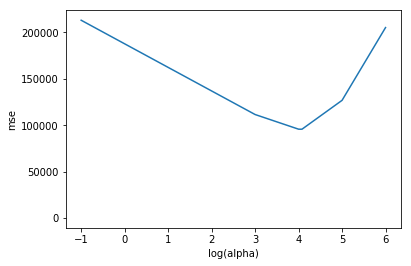

In [29]:
### 2.1 岭回归模型评价
mse_mean = np.mean(reg.cv_values_, axis=0)

#正则项参数取对数， mse_mean.reshape() 干什么的？拉平
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas), 1))
# 在最佳参数位置绘制竖线：注意第二个参数值要和 Y 坐标轴匹配
plt.plot(np.log10(reg.alpha_)*np.ones(3), [0.33, 0.55, 0.99])
# plt.show() #绘制在一张图上，显示异常，暂时分开 

plt.xlabel('log(alpha)')
plt.ylabel('mse')

print('best alpha is:', reg.alpha_)

In [30]:
## 2.2 岭回归 模型与 LinearRegression 的比较
# 使用 RidgeCV 模型自带的评估模块（r2_score），并输出评估结果
#训练集
ridgeScoreTrain = reg.score(train_X, train_y)
print('The value of default measurement of RidgeRegression on train is', ridgeScoreTrain) 
print('ridgeScoreTrain - lrScoreTrain = ', ridgeScoreTrain - lrScoreTrain)
# The value of default measurement of RidgeRegression on train is 0.633948526875
# ridgeScoreTrain - lrScoreTrain =  -0.131696775147

The value of default measurement of RidgeRegression on train is 0.633948526875
ridgeScoreTrain - lrScoreTrain =  -0.131696775147


In [31]:
#对测试数据进行预测
ridge_y_predict_test = reg.predict(test_X)
print('ridge_y_predict_test = ', ridge_y_predict_test)

# 标准化数据还原 
ridge_y_predict_test = inverse_StandardScaler(ridge_y_predict_test)

ridge_y_predict_test =  [-18.88942401 -19.80936475 -19.80744419 ..., -19.45165126 -19.81638735
 -19.81638735]


In [32]:
#输出预测后的数据
testPredict = generate_summit(ridge_y_predict_test)
testPredict.head()

,user_id,prediction_pay_price
0,14933,0.0000
1,14934,0.0000
2,14935,0.0000
3,14936,0.0000
4,14937,0.0000


In [33]:
#输出预测后的数据
testPredict.to_csv(summit_path + 'summit0.1-coor0.3-pay-ridge'+out_id+'.csv', index=False)
testPredict.shape

(828934, 2)

## 3 正则化的线性回归（L1正则 --> Lasso）

In [34]:
# Lasso／L1正则
from sklearn.linear_model import LassoCV

#正则项系数
# alphas = [0.1, 1, 10, 100, 1000, 10000, 10000]
alphas = [0.01, 0.1, 0.16, 0.17, 0.171, 0.172, 0.173, 0.174, 0.175, 0.176, 0.18, 0.2, 0.5, 1]

# Lasso 模型实例
lasso = LassoCV(alphas=alphas)

#进行模型训练
lasso.fit(train_X, train_y)

D:\Applications\Anaconda\envs\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Applications\Anaconda\envs\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[0.01, 0.1, 0.16, 0.17, 0.171, 0.172, 0.173, 0.174, 0.175, 0.176, 0.18, 0.2, 0.5, 1],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

best alpha is: 1.0


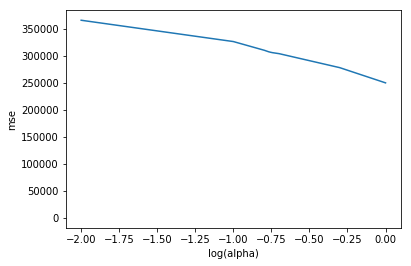

In [35]:
## 3.1 Lasso 模型评价
mses = np.mean(lasso.mse_path_, axis=1)

#plt.plot(np.log10(alphas), mses)
plt.plot(np.log10(lasso.alphas_), mses)
# plt.show()  #绘制在一张图上，显示异常，暂时分开 

plt.plot(np.log10(lasso.alpha_)*np.ones(3), [0.4, 0.7, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
# plt.show() 

print ('best alpha is:', lasso.alpha_)

In [36]:
## 3.2 Lasso 模型与 LinearRegression 的比较
# 使用 Lasso 模型自带的评估模块（r2_score），并输出评估结果
#训练集
lassoScoreTrain = lasso.score(train_X, train_y)
print('The value of default measurement of Lasso on train is', lassoScoreTrain) 
print('lassoScoreTrain - lrScoreTrain = ', lassoScoreTrain - lrScoreTrain)
# The value of default measurement of Lasso on train is 0.630665434638
# lassoScoreTrain - lrScoreTrain =  -0.134979867385

The value of default measurement of Lasso on train is 0.758717023075
lassoScoreTrain - lrScoreTrain =  -0.00692827894786


In [37]:
#对测试数据进行预测
lasso_y_predict_test = lasso.predict(test_X)
print('lasso_y_predict_test = ', lasso_y_predict_test)

# 标准化数据还原 
lasso_y_predict_test = inverse_StandardScaler(lasso_y_predict_test)

lasso_y_predict_test =  [-17.1949632  -17.40854397 -17.43509977 ..., -16.74953539 -17.48950495
 -17.48950495]


In [38]:
testPredict = generate_summit(lasso_y_predict_test)
testPredict.head()

,user_id,prediction_pay_price
0,14933,0.0000
1,14934,0.0000
2,14935,0.0000
3,14936,0.0000
4,14937,0.0000


In [39]:
#输出预测后的数据
testPredict.to_csv(summit_path + 'summit0.1-coor0.3-pay-lasso'+out_id+'.csv', index=False)
testPredict.shape

(828934, 2)